# Prevendo qual candidato irá ganhar a elieção baseado na quantidade de dinheiro gasto por ele

OBS:
<ul>
<li>0: Não ganha</li>
<li>1: Ganha</li>
</ul>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sn


In [2]:
dataset = pd.read_csv("C:/Users/PICHAU/PycharmProjects/Udemy/Arquivos/Eleicao.csv", ";")
dataset.head()

,CANDIDATO,SITUACAO,DESPESAS
0,George Turner,0,10
1,Victor Johnson,0,100
2,Jerry Perry,1,1600
3,Shirley Cook,1,1500
4,Carolyn Bailey,1,3300


In [3]:
dataset.describe()

,SITUACAO,DESPESAS
count,47.000000,47.000000
mean,0.510638,1085.744681
std,0.505291,870.968338
min,0.000000,10.000000
25%,0.000000,300.000000
50%,1.000000,800.000000
75%,1.000000,1700.000000
max,1.000000,3300.000000


In [4]:
dataset.shape

(47, 3)

In [12]:
#Verificando o coeficiente de correlação. Pode-se percecber que a correlação é forte e positiva.
np.corrcoef(dataset['DESPESAS'], dataset['SITUACAO'])

array([[1.        , 0.81218717],
       [0.81218717, 1.        ]])

C:\Users\PICHAU\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


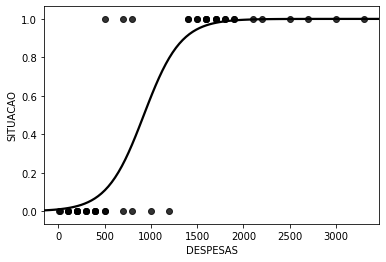

In [6]:
#Plotando o gráfico de dispersão com a curva sigmóide.
sn.regplot(x = 'DESPESAS', y = 'SITUACAO', data= dataset, logistic = True, color = 'black')

In [24]:
X = dataset['DESPESAS'].values
y = dataset['SITUACAO'].values
X = X.reshape(-1, 1)
X

array([[  10],
       [ 100],
       [1600],
       [1500],
       [3300],
       [ 200],
       [1800],
       [1700],
       [ 300],
       [1800],
       [ 100],
       [ 500],
       [3000],
       [  20],
       [ 200],
       [ 700],
       [1600],
       [1900],
       [ 100],
       [ 400],
       [2700],
       [ 200],
       [ 300],
       [ 500],
       [2500],
       [1400],
       [ 700],
       [1700],
       [1400],
       [1600],
       [ 400],
       [ 200],
       [1600],
       [2200],
       [1900],
       [ 200],
       [1200],
       [1700],
       [1500],
       [2100],
       [ 400],
       [ 800],
       [ 400],
       [ 500],
       [1000],
       [ 300],
       [ 800]], dtype=int64)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) 

In [28]:
modelo = LogisticRegression().fit(X_train, y_train)
previsao = modelo.predict(X_test)
previsao

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

In [31]:
modelo.score(X_test, y_test)

1.0

In [33]:
#Lendo um novo conjunto de dados.
new_dataset = pd.read_csv("C:/Users/PICHAU/PycharmProjects/Udemy/Arquivos/NovosCandidatos.csv", ";")
new_dataset.head()

,CANDIDATO,DESPESAS
0,A,0
1,B,10
2,C,200
3,D,500
4,E,900


In [36]:
despesas = new_dataset['DESPESAS'].values
despesas = despesas.reshape(-1, 1)
despesas

array([[   0],
       [  10],
       [ 200],
       [ 500],
       [ 900],
       [1500],
       [3000]], dtype=int64)

In [37]:
#Prevendo para o novo conjunto de dados.
nova_previsao = modelo.predict(despesas)
nova_previsao

array([0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [39]:
#Incluindo uma coluna com as previsões.
new_dataset['SITUACAO'] = nova_previsao
new_dataset

,CANDIDATO,DESPESAS,SITUACAO
0,A,0,0
1,B,10,0
2,C,200,0
3,D,500,0
4,E,900,0
5,F,1500,1
6,G,3000,1
